In [ ]:
# Dataset location (edit as needed)
root_dir = '/Midgard/Data/hfang/sn7/'
pred_dir = '/Midgard/home/hfang/temporal_CD/CosmiQ_SN7_Baseline/inference/sn7_baseline_preds/raw'
pred_npy_dir = '/Midgard/home/hfang/temporal_CD/CosmiQ_SN7_Baseline/inference/sn7_baseline_preds/npy'

In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import skimage
import gdal
import sys
import os

import matplotlib as mpl
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.rcParams.update({'font.size': 16})
mpl.rcParams['figure.dpi'] = 300

import solaris as sol
from solaris.raster.image import create_multiband_geotiff
from solaris.utils.core import _check_gdf_load

# import from data_prep_funcs
module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from sn7_baseline_prep_funcs import map_wrapper, make_geojsons_and_masks

/Midgard/home/hfang/miniconda3/envs/solaris/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Midgard/home/hfang/miniconda3/envs/solaris/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Midgard/home/hfang/miniconda3/envs/solaris/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Midgard/home/hfang

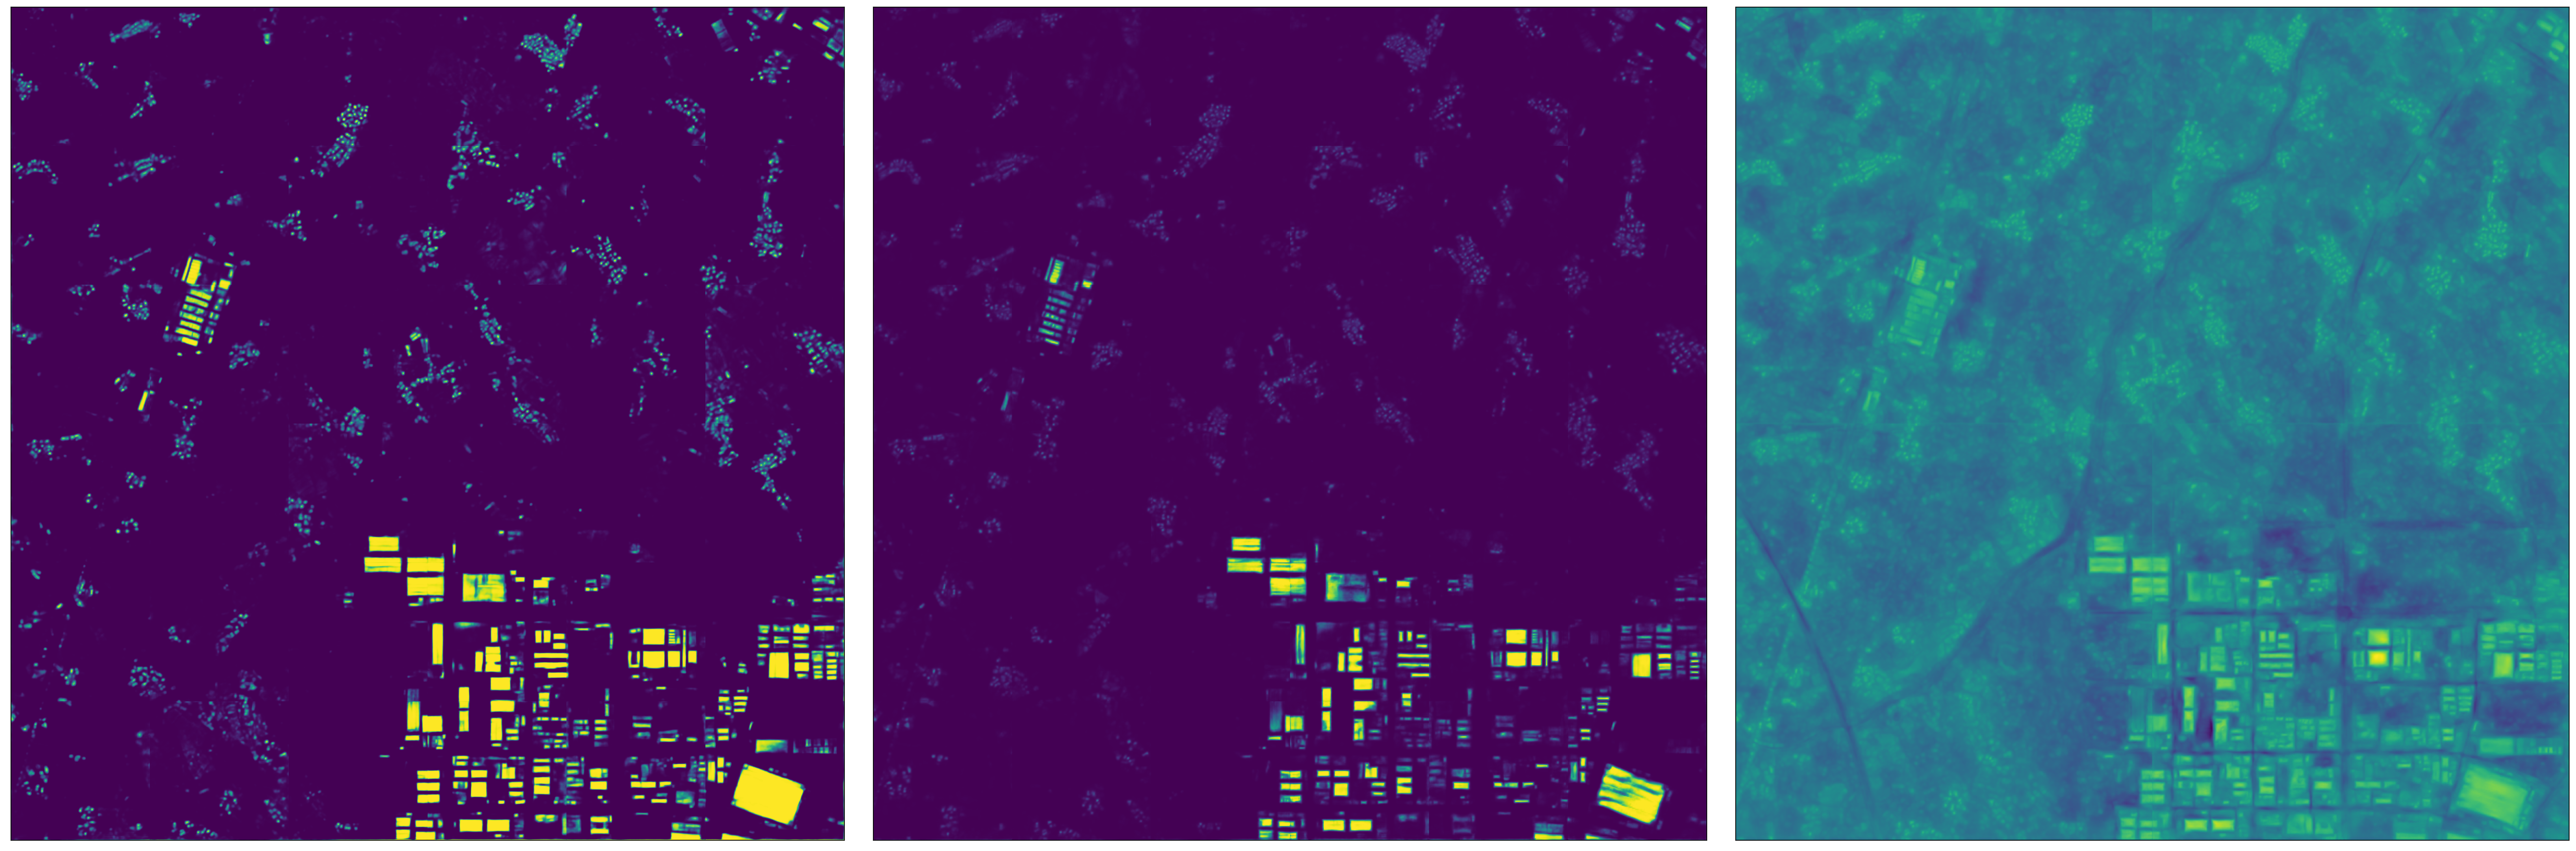

In [3]:
# Inspect visually
winner = np.load('/local_storage/users/hfang/winner_docker/vis/grouped/L15-1690E-1211N_6763_3346_13/masks/global_monthly_2018_05_mosaic_L15-1690E-1211N_6763_3346_13.npy')
ours = np.load('/local_storage/users/hfang/HRNet_SN7/output/spacenet7/seg_hrnet_w48_512x512_sgd_lr1e-2_wd4e-5_bs_16_epoch70/test_results/npy_compose/global_monthly_2018_05_mosaic_L15-1690E-1211N_6763_3346_13.npy')
baseline = np.load('/local_storage/users/hfang/inference_winner_split/sn7_baseline_preds/npy/global_monthly_2018_05_mosaic_L15-1690E-1211N_6763_3346_13.npy')

figsize=(36, 12)
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=figsize)
_ = ax0.imshow(winner)
ax0.set_xticks([])
ax0.set_yticks([])
# _ = ax0.set_title(name)
_ = ax1.imshow(ours)
ax1.set_xticks([])
ax1.set_yticks([])
# _ = ax1.set_title(name)
_ = ax2.imshow(baseline)
ax2.set_xticks([])
ax2.set_yticks([])
# _ = ax2.set_title(name)
plt.tight_layout()